In [2]:
import numpy as np
import pandas as pd
import random
import copy
import networkx as nx
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score

In [3]:
def game_community_opinion(W, S_RANDOM, X_INI, Lambda = 1.5, BETA = 1, gamma = 0.95, ETA=0.1):
    """
    ################################ 输入参数 ###############################
        Influence matrix W : n*n, 
        initial opinion vector X_INI : n*1, 
        equilibrium initial community membership matrix S_INI : n*c,
        diagonal matrix Lambda_MATRIX : n*n,
        tuning parameters BETA and gamma.
    """
    t = 0
    S_STAR = S_RANDOM
    row_identity = np.ones((n, 1))
    ALL_ONES = np.ones((n, n))
    #Lambda_MATRIX = Lambda*ALL_ONES
    #IDENTITY_MATRIX = np.eye(n)
    
    Lambda_MATRIX = Lambda*np.eye(n)
    
    ############### 节点i的邻居节点 ： W_ij + W_ji > 0 and i #####################
    Neighbor_set = []
    Neighbor_MATRIX = W + W.T + np.eye(n)
    for i in range(n):
        Neighbor_set.append(list(np.where(Neighbor_MATRIX[i])[0]))
        
    FINAL_PHI_S = 0
    
#     ALL_ACL = []
#     ALL_X = []
    
    while 1:
        #print('########################### t = %d ######################'%t)
        
        E = X_INI*row_identity.T - row_identity*X_INI.T
        E = np.abs(E)
        D = ETA - E
        B = np.maximum(0, D)
        
        C = np.matmul(Lambda_MATRIX, D) - B
        Y = C*W+C.T*W.T
        
#         Lambda_MODIFY = Lambda_MATRIX - 1
#         C = Lambda_MODIFY*W + W.T*Lambda_MODIFY
#         Y = C*D

        Z = Y.reshape(n, 1, n)
        
        S_INI = copy.deepcopy(S_STAR)
        S_Y = np.matmul(S_INI.T, Y)
        S_Y_S = np.matmul(S_Y, S_INI)
        PHI_S = 0.5*S_Y_S.trace()
        
        DELTA_PHI = 1e10
        
#         COMMUNITY_RELATIONSHIP = np.matmul(S_INI, S_INI.T)
#         COMMUNITY_OPINION = np.matmul(COMMUNITY_RELATIONSHIP, X_INI)
#         COMMUNITY_NUMBER = np.matmul(COMMUNITY_RELATIONSHIP, row_identity)
#         COMMUNITY_DISTANCE = X_INI - COMMUNITY_OPINION/COMMUNITY_NUMBER
#         COMMUNITY_DISTANCE = np.abs(COMMUNITY_DISTANCE)
#         COMMUNITY_DISTANCE = row_identity - COMMUNITY_DISTANCE
#         COMMUNITY_DISTANCE = COMMUNITY_DISTANCE/COMMUNITY_NUMBER
#         ACL = np.matmul(row_identity.T, COMMUNITY_DISTANCE)
#         all_community_number = len(set(list(np.where(S_INI==1)[1])))
#         ALL_ACL.append(ACL/all_community_number)
        
#         ALL_X.append(X_INI)
        
        ################################  更新社区标签  ################################
        while DELTA_PHI!=0:
            DELTA_PHI = 0
            for i in range(n):
                F_i = S_INI[Neighbor_set[i]]
                S_S = np.matmul(F_i, S_INI.T)
                P_i = np.matmul(S_S, Z[i].T)
                V_i = P_i.argmax()
                S_i_star = F_i[V_i]
                
                #S_max = np.matmul(S_i_star, S_INI.T)
                S_MINUS_S_S = np.matmul(S_i_star - S_INI[i], S_INI.T)
                DELTA_PHI += np.matmul(S_MINUS_S_S, Z[i].T)
                S_INI[i] = S_i_star
                
                """
                if np.matmul(S_max, Z[i].T) < 0:
                    S_INI[i] = EXTEND_COMMUNITY
                else:
                    S_MINUS_S_S = np.matmul(S_i_star - S_INI[i], S_INI.T)
                    DELTA_PHI += np.matmul(S_MINUS_S_S, Z[i].T)
                    S_INI[i] = S_i_star
                """
            
            PHI_S += DELTA_PHI[0]
            #print("PHI_S : %d"%PHI_S)
            
        beta_gamma = BETA*pow(gamma, t)
        Xi_t = beta_gamma*ALL_ONES
        relu_D = np.maximum(0, Xi_t - E)
        W_D = W*relu_D
        
        X_S_S = np.matmul(S_INI, S_INI.T)
        Lambda_MODIFY = Lambda*ALL_ONES - 1
        X_S_S_MODIFY = 1 + Lambda_MODIFY*X_S_S
        
        THETA = X_S_S_MODIFY*W_D
        
        GAMMA = np.matmul(THETA, ALL_ONES) + ALL_ONES
        PHI = THETA / GAMMA
        
        PHI_prime = np.matmul(THETA, row_identity) + row_identity
        PHI_prime = row_identity / PHI_prime
        
        X_UPDATE = PHI_prime*X_INI + np.matmul(PHI, X_INI)
        
        S_STAR = S_INI
        
#         print("PHI_S : ",PHI_S)
#         print("FINAL_PHI_S : ",FINAL_PHI_S)
        
        DETA_X = np.abs(X_UPDATE - X_INI)
        if DETA_X.max() < 1e-3:
            break
        #if PHI_S - FINAL_PHI_S < 1e-3:
            #break
        
        X_INI = X_UPDATE
        FINAL_PHI_S = PHI_S
        
        t += 1
        
    return S_STAR, X_UPDATE
#     return S_STAR, X_UPDATE, PHI, ALL_ACL, ALL_X

In [4]:
"""
##############################  全局变量  #############################
n : 节点数量
c : 初始社区数量
"""
# G = nx.read_gml('dolphins.gml')
# W = np.array(nx.adjacency_matrix(G).todense())

# W = np.zeros((105, 105))
# edges = pd.read_csv('polbooks.mtx', header=None, sep=' ')
# edges = edges - 1
# row = edges[0]
# col = edges[1]
# for i in range(len(row)):
#     W[row[i]][col[i]]=1
#     W[col[i]][row[i]]=1

row = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4,5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 10, 10,10, 11, 12, 12, 13, 13, 13, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17,18, 18, 19, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 23, 23, 23, 24,24, 24, 25, 25, 25, 26, 26, 27, 27, 27, 27, 28, 28, 28, 29, 29, 29,29, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32,32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,33, 33, 33, 33, 33, 33]
col = [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31, 0, 2, 3, 7,13, 17, 19, 21, 30, 0, 1, 3, 7, 8, 9, 13, 27, 28, 32, 0, 1, 2, 7,12, 13, 0, 6, 10, 0, 6, 10, 16, 0, 4, 5, 16, 0, 1, 2, 3, 0, 2, 30,32, 33, 2, 33, 0, 4, 5, 0, 0, 3, 0, 1, 2, 3, 33, 32, 33, 32, 33, 5,6, 0, 1, 32, 33, 0, 1, 33, 32, 33, 0, 1, 32, 33, 25, 27, 29, 32,33, 25, 27, 31, 23, 24, 31, 29, 33, 2, 23, 24, 33, 2, 31, 33, 23,26, 32, 33, 1, 8, 32, 33, 0, 24, 25, 28, 32, 33, 2, 8, 14, 15, 18,20, 22, 23, 29, 30, 31, 33, 8, 9, 13, 14, 15, 18, 19, 20, 22, 23,26, 27, 28, 29, 30, 31, 32]
W = np.zeros((34, 34))
for i in range(len(row)):
    W[row[i]][col[i]]=1

n = W.shape[0]
M = W.sum()
ALL_ONES = np.ones((n, n))

c = 20

In [5]:
def computer_sw(X_INI, S_INI, W, Lambda, ETA):
    row_identity = np.ones((n, 1))
    Lambda_MATRIX = Lambda*np.eye(n)
    E = X_INI*row_identity.T - row_identity*X_INI.T
    E = np.abs(E)
    D = ETA - E
    B = np.maximum(0, D)
    C = np.matmul(Lambda_MATRIX, D) - B
    C_W = C*W
    S_C = np.matmul(S_INI.T, C_W)
    S_C_S = np.matmul(S_C, S_INI)
    B_W = np.matmul(B, W)
    return S_C_S.trace() + B_W.trace()

In [6]:
ALL_SW_IMPROVE = []
ALL_FINAL_SW = []

ETA_VALUE = 0.4

for lambda_change in [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5]:
    
    SINGLE_SW_IMPROVE = []
    SINGLE_FINAL_SW = []
    lambda_n = lambda_change*M
    lambda_n_max = lambda_change*M*ETA_VALUE
    
    for SEED in range(100):

        S = np.zeros((n, c))
        random.seed(SEED)
        community_index = [random.randint(0, c-1) for _ in range(n)]
        for i in range(n):
            S[i][community_index[i]]=1

        np.random.seed(SEED)
        X = np.random.uniform(0, 1, [n, 1])
        
        INI_SW = computer_sw(X, S, W, Lambda=lambda_change, ETA = ETA_VALUE)
        
        FINAL_S, FINAL_X = game_community_opinion(W, S, X, Lambda = lambda_change, ETA = ETA_VALUE, gamma = 0.9)
        
        FINAL_SW = computer_sw(FINAL_X, FINAL_S, W, Lambda=lambda_change, ETA = ETA_VALUE)
        
        SINGLE_FINAL_SW.append(FINAL_SW/lambda_n_max)
        
        SW_IMPROVE = FINAL_SW - INI_SW
        SINGLE_SW_IMPROVE.append(SW_IMPROVE/lambda_n)
        
    ALL_FINAL_SW.append(SINGLE_FINAL_SW)
    ALL_SW_IMPROVE.append(SINGLE_SW_IMPROVE)

In [7]:
ETA_ALL_SW_IMPROVE = []
ETA_ALL_FINAL_SW = []
lambda_value = 1.2

for ETA_VALUE in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]:
    
    ETA_SINGLE_SW_IMPROVE = []
    ETA_SINGLE_FINAL_SW = []
    #lambda_n = lambda_value*ETA_VALUE*M
    lambda_n = lambda_value*M
    lambda_n_max = lambda_value*M*ETA_VALUE
    
    for SEED in range(100):

        S = np.zeros((n, c))
        random.seed(SEED)
        community_index = [random.randint(0, c-1) for _ in range(n)]
        for i in range(n):
            S[i][community_index[i]]=1

        np.random.seed(SEED)
        X = np.random.uniform(0, 1, [n, 1])
        
        INI_SW = computer_sw(X, S, W, Lambda=lambda_value, ETA = ETA_VALUE)
        
        FINAL_S, FINAL_X = game_community_opinion(W, S, X, Lambda = lambda_value, ETA = ETA_VALUE, gamma = 0.9)
        
        FINAL_SW = computer_sw(FINAL_X, FINAL_S, W, Lambda=lambda_value, ETA = ETA_VALUE)
        
        ETA_SINGLE_FINAL_SW.append(FINAL_SW/lambda_n_max)
        
        ETA_SW_IMPROVE = FINAL_SW - INI_SW
        ETA_SINGLE_SW_IMPROVE.append(ETA_SW_IMPROVE/lambda_n)
    
    ETA_ALL_FINAL_SW.append(ETA_SINGLE_FINAL_SW)
    ETA_ALL_SW_IMPROVE.append(ETA_SINGLE_SW_IMPROVE)

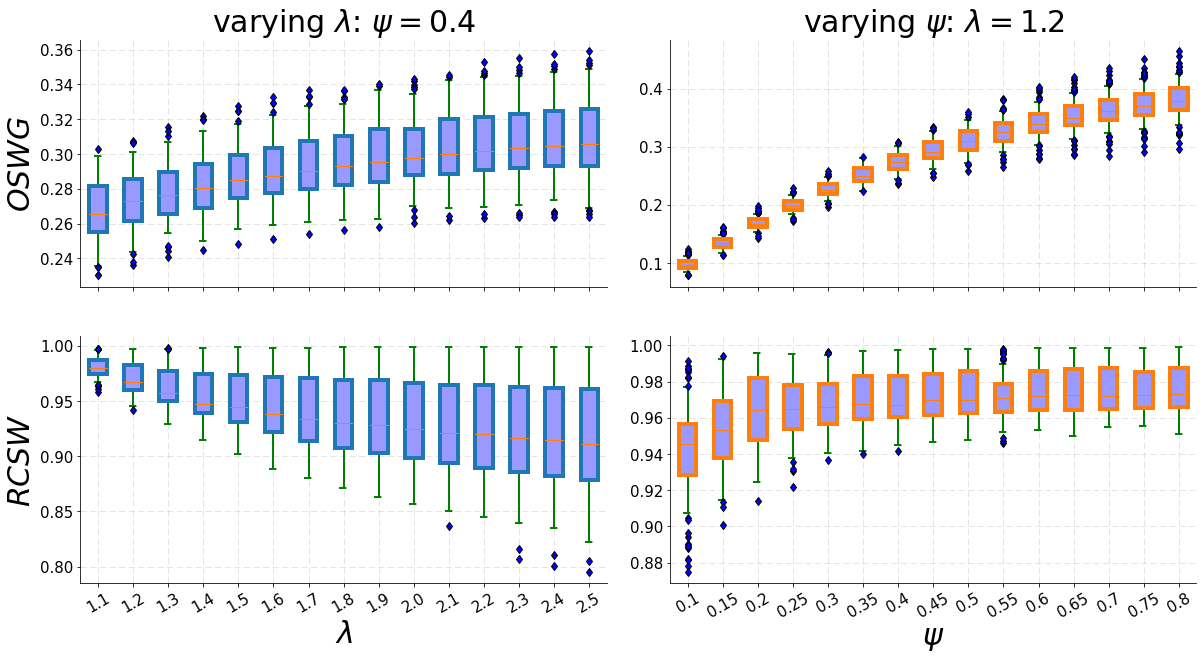

In [22]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)
plt.subplots_adjust(wspace=0.12)

green_diamond = dict(markerfacecolor='b', marker='d')

X_INDEX = np.arange(1, len(ALL_SW_IMPROVE)+1)

#axes[0, 0].boxplot(ALL_SW_IMPROVE, labels=[1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5], showmeans=True)

axes[0, 0].boxplot(ALL_SW_IMPROVE, 
                   labels=[1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5], 
                   vert=True, patch_artist=True, whis=0.75, flierprops=green_diamond,
                   widths = 0.5,
                   boxprops = {'color':'C0', 'facecolor':'#9999ff', 'linewidth': 4},
                   meanprops = {'marker':'D','markerfacecolor':'indianred'},
                   capprops={'color': 'g', 'linewidth': 2, 'linestyle': '--'},
                   whiskerprops={'color': 'g', 'linewidth': 2, 'linestyle': '-'}
                  )

axes[0, 0].yaxis.grid(True, which='major', linestyle = (0,(8,4)), alpha=0.4) # 在y轴上添加网格线
axes[0, 0].xaxis.grid(True, which='major',linestyle = (0,(8,4)), alpha=0.4) # 在y轴上添加网格线
axes[0, 0].set_xticks(X_INDEX) # 指定x轴的轴刻度个数
#axes[0, 0].set_xlabel(r'$\lambda$', size = 20) #设置x轴名称
axes[0, 0].set_ylabel(r'$OSWG$', size = 30) #设置x轴名称
#axes[0, 0].set_ylim(0, 1)
axes[0, 0].set_title(r'varying $\lambda$: $\psi=0.4$', size=30) ##设置图片标题
axes[0, 0].set_xticklabels([1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5], rotation=45, ha='right')
#axes[0, 0].get_xticklabels()[3].set_color("red")
#axes[0, 0].legend(handles=[box0_1['boxes'][0], box0_2['boxes'][0]], labels=['ARI','AMI'])
axes[0, 0].spines['right'].set_visible(False)
axes[0, 0].spines['top'].set_visible(False)
axes[0, 0].axes.xaxis.set_ticklabels([])
axes[0, 0].tick_params(labelsize=15)

ETA_X_INDEX = np.arange(1, len(ETA_ALL_SW_IMPROVE)+1)

#axes[0, 1].boxplot(ETA_ALL_SW_IMPROVE, labels=[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8], showmeans=True)

axes[0, 1].boxplot(ETA_ALL_SW_IMPROVE, 
                   labels=[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8], 
                   vert=True, patch_artist=True, whis=0.75, flierprops=green_diamond, widths = 0.5,
                   boxprops = {'color':'C1', 'facecolor':'#9999ff', 'linewidth': 4},
                   meanprops = {'marker':'D','markerfacecolor':'indianred'},
                   capprops={'color': 'g', 'linewidth': 2, 'linestyle': '--'},
                   whiskerprops={'color': 'g', 'linewidth': 2, 'linestyle': '-'}
                  )

axes[0, 1].yaxis.grid(True, which='major', linestyle = (0,(8,4)), alpha=0.4) # 在y轴上添加网格线
axes[0, 1].xaxis.grid(True, which='major',linestyle = (0,(8,4)), alpha=0.4) # 在y轴上添加网格线
axes[0, 1].set_xticks(ETA_X_INDEX) # 指定x轴的轴刻度个数
#axes[0, 1].set_xlabel(r'$\psi$', size = 20) #设置x轴名称
#axes[1].set_ylabel(r'$NSWG$', size = 20) #设置x轴名称
#axes[1].set_ylim(-200, 200)
axes[0, 1].set_title(r'varying $\psi$: $\lambda=1.2$', size=30) ##设置图片标题
axes[0, 1].set_xticklabels([0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8], rotation=45, ha='right')
#axes[0, 0].get_xticklabels()[3].set_color("red")
#axes[0, 0].legend(handles=[box0_1['boxes'][0], box0_2['boxes'][0]], labels=['ARI','AMI'])
axes[0, 1].spines['right'].set_visible(False)
axes[0, 1].spines['top'].set_visible(False)
axes[0, 1].axes.xaxis.set_ticklabels([])
axes[0, 1].tick_params(labelsize=15)



X_INDEX = np.arange(1, len(ALL_FINAL_SW)+1)

# box0_1 = axes[0].boxplot(ALL_SW_IMPROVE, 
#                             positions=X_INDEX, vert=True, patch_artist=True, whis=0.3, flierprops=green_diamond,
#                             widths = 0.1,
#                             boxprops = {'color':'#ef476f', 'facecolor':'#9999ff', 'linewidth': 2},
#                             meanprops = {'marker':'D','markerfacecolor':'indianred'},
#                             capprops={'color': 'red', 'linewidth': 1, 'linestyle': '--'},
#                             whiskerprops={'color': 'g', 'linewidth': 1, 'linestyle': '-'}
#                            )
#axes[1, 0].boxplot(ALL_FINAL_SW, labels=[1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5], showmeans=True)

axes[1, 0].boxplot(ALL_FINAL_SW, 
                   labels=[1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5], 
                   vert=True, patch_artist=True, whis=0.75, flierprops=green_diamond,
                   widths = 0.5,
                   boxprops = {'color':'C0', 'facecolor':'#9999ff', 'linewidth': 4},
                   meanprops = {'marker':'D','markerfacecolor':'indianred'},
                   capprops={'color': 'g', 'linewidth': 2, 'linestyle': '--'},
                   whiskerprops={'color': 'g', 'linewidth': 2, 'linestyle': '-'}
                  )

axes[1, 0].yaxis.grid(True, which='major', linestyle = (0,(8,4)), alpha=0.4) # 在y轴上添加网格线
axes[1, 0].xaxis.grid(True, which='major',linestyle = (0,(8,4)), alpha=0.4) # 在y轴上添加网格线
axes[1, 0].set_xticks(X_INDEX) # 指定x轴的轴刻度个数
axes[1, 0].set_xlabel(r'$\lambda$', size = 30) #设置x轴名称
axes[1, 0].set_ylabel(r'$RCSW$', size = 30) #设置x轴名称
#axes[0, 0].set_ylim(0, 1)
#axes[1, 0].set_title(r'varying $\lambda$: $\psi=0.4$', size=25) ##设置图片标题
axes[1, 0].set_xticklabels([1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5], rotation=30, ha='center')
#axes[0, 0].get_xticklabels()[3].set_color("red")
#axes[0, 0].legend(handles=[box0_1['boxes'][0], box0_2['boxes'][0]], labels=['ARI','AMI'])
axes[1, 0].spines['right'].set_visible(False)
axes[1, 0].spines['top'].set_visible(False)
#axes[0].axes.xaxis.set_ticklabels([])
axes[1, 0].tick_params(labelsize=15)



ETA_X_INDEX = np.arange(1, len(ETA_ALL_FINAL_SW)+1)

#axes[1, 1].boxplot(ETA_ALL_FINAL_SW, labels=[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8], showmeans=True)

axes[1, 1].boxplot(ETA_ALL_FINAL_SW, 
                   labels=[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8], 
                   vert=True, patch_artist=True, whis=0.75, flierprops=green_diamond, widths = 0.5,
                   boxprops = {'color':'C1', 'facecolor':'#9999ff', 'linewidth': 4},
                   meanprops = {'marker':'D','markerfacecolor':'indianred'},
                   capprops={'color': 'g', 'linewidth': 2, 'linestyle': '--'},
                   whiskerprops={'color': 'g', 'linewidth': 2, 'linestyle': '-'}
                  )

axes[1, 1].yaxis.grid(True, which='major', linestyle = (0,(8,4)), alpha=0.4) # 在y轴上添加网格线
axes[1, 1].xaxis.grid(True, which='major',linestyle = (0,(8,4)), alpha=0.4) # 在y轴上添加网格线
axes[1, 1].set_xticks(ETA_X_INDEX) # 指定x轴的轴刻度个数
axes[1, 1].set_xlabel(r'$\psi$', size = 30) #设置x轴名称
#axes[1].set_ylabel(r'$NSWG$', size = 20) #设置x轴名称
#axes[1].set_ylim(-200, 200)
#axes[1, 1].set_title(r'varying $\psi$: $\lambda=1.4$', size=25) ##设置图片标题
axes[1, 1].set_xticklabels([0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8], rotation=30, ha='center')
#axes[0, 0].get_xticklabels()[3].set_color("red")
#axes[0, 0].legend(handles=[box0_1['boxes'][0], box0_2['boxes'][0]], labels=['ARI','AMI'])
axes[1, 1].spines['right'].set_visible(False)
axes[1, 1].spines['top'].set_visible(False)
axes[1, 1].tick_params(labelsize=15)

plt.savefig('varying.pdf', bbox_inches = 'tight')